<a href="https://colab.research.google.com/github/khimanshu138/Data-Analysis-with-Python/blob/main/Practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

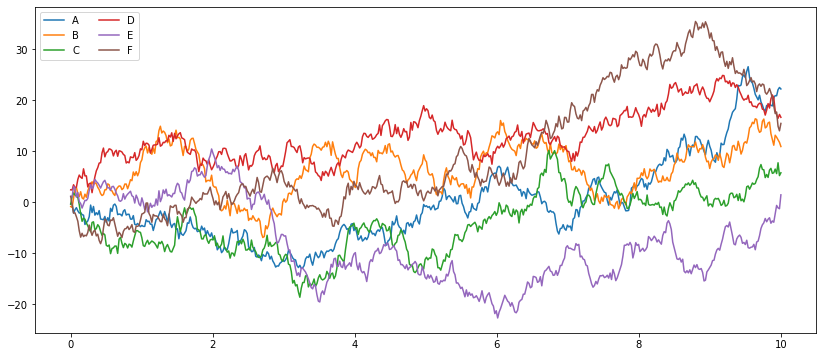

In [5]:
x=np.linspace(0, 10, 500)
y=np.cumsum(np.random.randn(500, 6),0)
plt.figure(figsize=(14,6))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [7]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={'periods': '3600','after': str(int(pd.Timestamp(after).timestamp()))})
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [10]:
last_week = (pd.Timestamp.now()-pd.offsets.Day(7))
last_week

Timestamp('2022-01-29 06:19:33.717466')

In [20]:
bitcoin = get_historic_price('btc', 'bitstamp', after=last_week)
bitcoin.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-01-29 07:00:00,37685.46,37870.95,37641.96,37788.14,14.330740,5.407607e+05
2022-01-29 08:00:00,37768.58,37959.81,37706.24,37868.82,21.997753,8.319331e+05
2022-01-29 09:00:00,37880.79,37956.73,37794.93,37814.00,39.306739,1.488365e+06
2022-01-29 10:00:00,37825.29,37827.99,37605.00,37730.28,29.461736,1.110661e+06
2022-01-29 11:00:00,37728.51,37839.66,37637.50,37770.66,21.281437,8.024878e+05


In [21]:
ethernet = get_historic_price('eth', 'bitstamp', after = last_week)
ethernet.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-01-29 07:00:00,2536.07,2552.33,2531.72,2546.06,71.775175,182375.098668
2022-01-29 08:00:00,2546.07,2571.10,2540.88,2571.10,337.690820,862171.119359
2022-01-29 09:00:00,2570.21,2576.76,2555.10,2558.52,175.352785,449344.782012
2022-01-29 10:00:00,2557.66,2558.64,2535.49,2550.98,207.100067,527026.568376
2022-01-29 11:00:00,2550.10,2557.68,2539.13,2552.95,143.848482,366518.529382


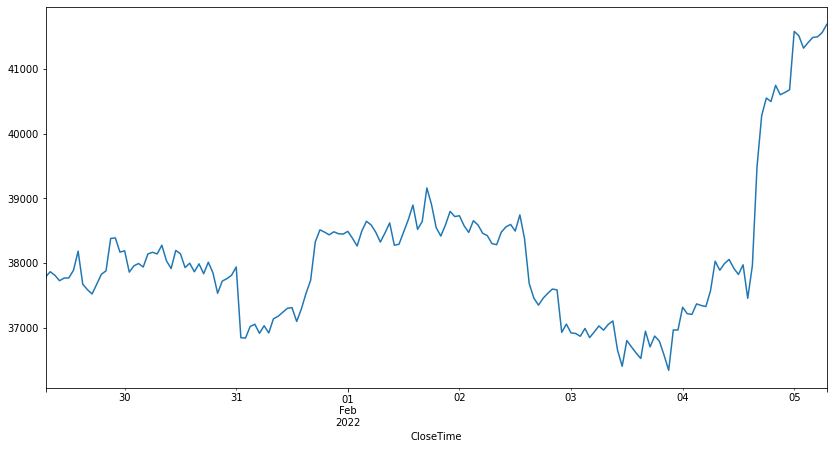

In [22]:
bitcoin['ClosePrice'].plot(figsize=(14,7))

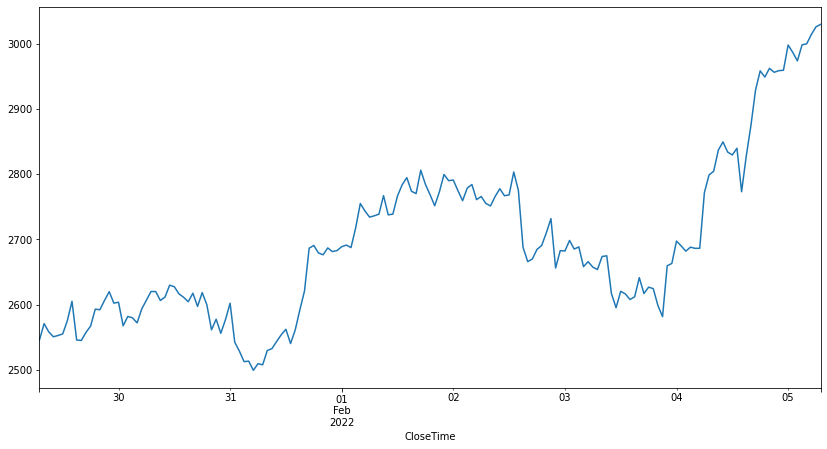

In [23]:
ethernet['ClosePrice'].plot(figsize=(14,7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


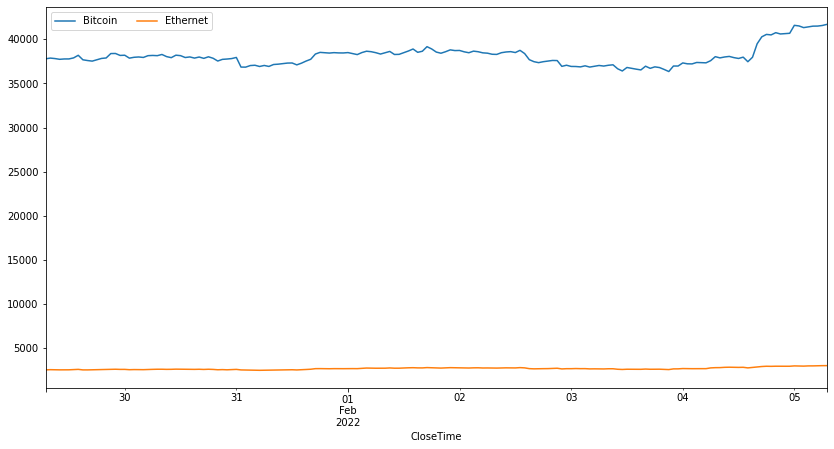

In [24]:
bitcoin['ClosePrice'].plot(figsize=(14,7))
ethernet['ClosePrice'].plot(figsize=(14,7))
plt.legend(('Bitcoin', 'Ethernet'), ncol=2, loc='Upper left')